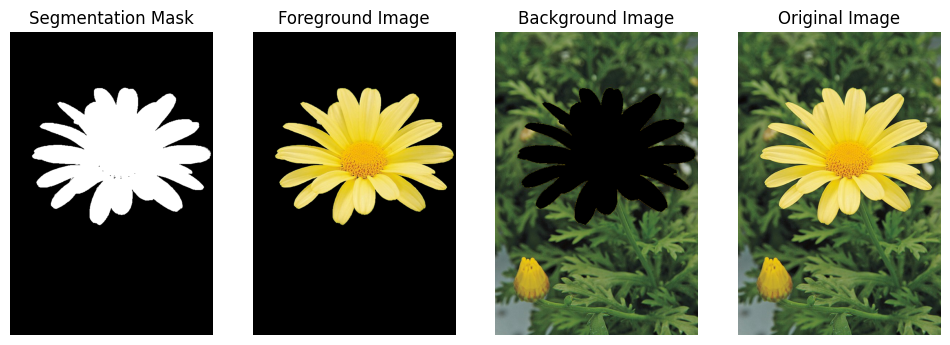

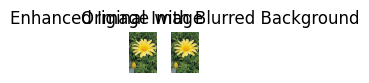

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img = cv.imread("../Assignment1_Images/daisy.jpg")

# Create a mask initialized with zeros
mask = np.zeros(img.shape[:2], np.uint8)

# Define a rectangle that contains the object of interest (flower)
rectangle = (50, 50, 505, 505)  # (x, y, width, height)

# Apply GrabCut algorithm with rectangle initialization
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create a binary mask where the probable background and definite background are set to 0
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground_img = img * mask1[:, :, np.newaxis]

# Apply GrabCut algorithm with mask initialization
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_MASK)

# Create a binary mask where the probable foreground and definite foreground are set to 0
mask2 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
background_img = img * mask2[:, :, np.newaxis]

# Display the images
fig, ax = plt.subplots(1, 4, figsize=(12, 12))
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[3].set_title("Original Image")
ax[3].axis("off")

plt.show()

# Create a binary mask for the background
background_mask = np.where((mask == 3) | (mask == 1), 1, 0).astype(np.uint8)

# Apply Gaussian blur to the background region
blurred_background = cv.GaussianBlur(img, (21, 21), 0)  # Adjust kernel size as needed

# Combine the blurred background and original foreground using the masks
enhanced_img = img * (1 - background_mask)[:, :, np.newaxis] + blurred_background * background_mask[:, :, np.newaxis]

# Display the original and enhanced images side by side
fig, axes = plt.subplots(1, 2, figsize=(1, 2))
axes[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
axes[1].set_title("Enhanced Image with Blurred Background")
axes[1].axis("off")

plt.tight_layout()
plt.show()


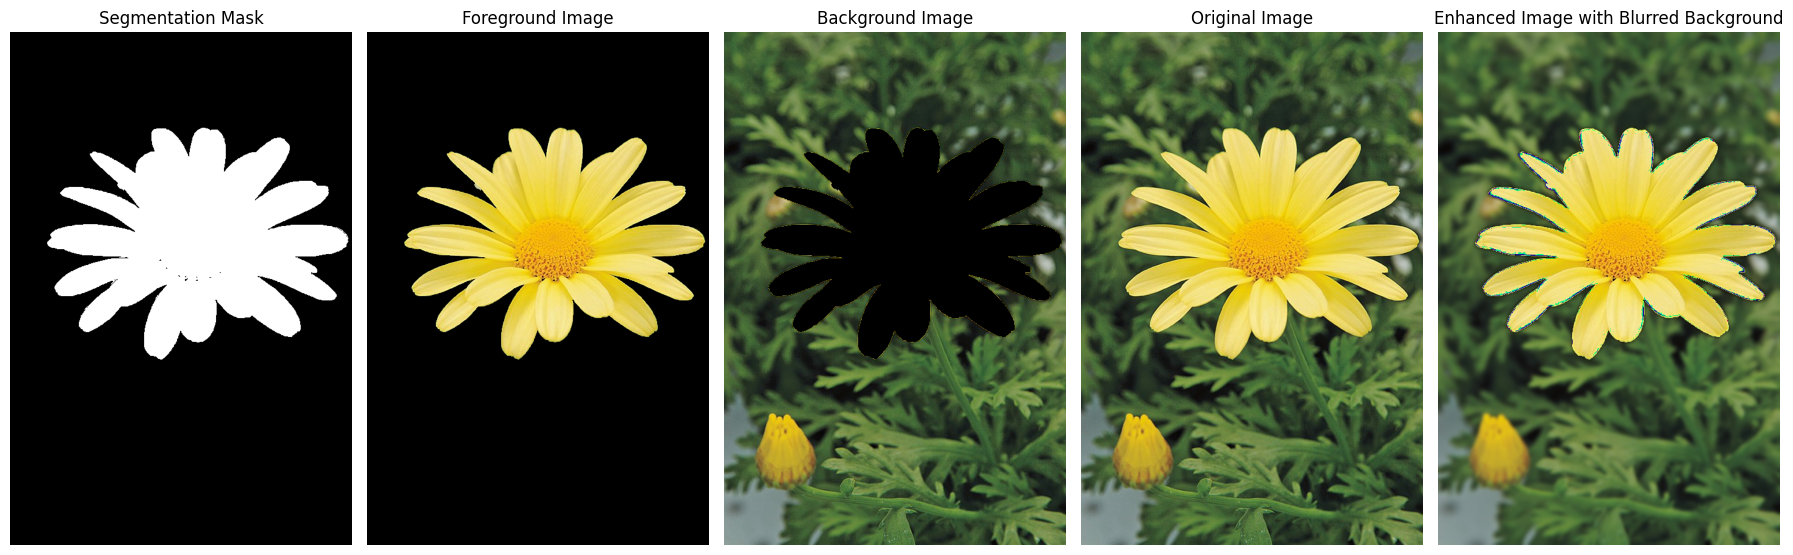

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread("../Assignment1_Images/daisy.jpg")

# Create a mask initialized with zeros
mask = np.zeros(img.shape[:2], np.uint8)

# Define a rectangle that contains the object of interest (flower)
rectangle = (50, 50, 505, 505)  # (x, y, width, height)

# Apply GrabCut algorithm with rectangle initialization
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create a binary mask where the probable background and definite background are set to 0
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground_img = img * mask1[:, :, np.newaxis]

# Apply GrabCut algorithm with mask initialization
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_MASK)

# Create a binary mask where the probable foreground and definite foreground are set to 0
mask2 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
background_img = img * mask2[:, :, np.newaxis]

# Create an enhanced image with a blurred background
blurred_img = foreground_img + cv.GaussianBlur(background_img, (15, 15), 0)

# Display the segmentation mask, foreground image, background image, original image, and enhanced image
fig, ax = plt.subplots(1, 5, figsize=(18, 10))

ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[3].set_title("Original Image")
ax[3].axis("off")

ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[4].set_title("Enhanced Image with Blurred Background")
ax[4].axis("off")

plt.tight_layout()
plt.savefig('Q9_last.png')
plt.show()

